In [1]:
import nltk
import numpy as np
import sklearn
import matplotlib as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Introduction to NLP
The “ratings.tsv” dataset is a subset of 8000 movie reviews from a larger dataset of 25,000 movie reviews (http://ai.stanford.edu/ amaas/data/sentiment/). The goal is to build a classification model that predicts whether or not the review is positive or negative based on the words in the review.

1. Import the data. Note that the dataset is tab delimited.

In [2]:
ratings = pd.read_csv("ratings.tsv", sep="\t")

In [3]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   8000 non-null   object
 1   review  7945 non-null   object
dtypes: object(2)
memory usage: 125.1+ KB


In [4]:
ratings.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


2. Check for and remove missing values and blank strings

In [5]:
ratings = ratings.dropna().reset_index()

In [6]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fostertruman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


3. Split the data into a training set and a test set. Use test size=0.33, stratify=y, and random state=801 (where y is the label positive or negative)

In [7]:
x = ratings.review
y = ratings.label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify = ratings.label, random_state = 801)

4. Vectorize the data using TF-IDF. Be sure that all model development is with the training data (fit the TF-IDF transformer on the training data, then transform to both training and test data).

In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 50, stop_words=stop_words)
tfidf.fit(x_train)
X_train = tfidf.transform(x_train)
X_test = tfidf.transform(x_test)

5. Build a machine learning classifier. Try out various models including: 
    • Support Vector Classifier 
    • Multilayer Perceptron 
    • Multinomial Naive Bayes 
    • (You are welcome to try other models if you want)

### Multinomial Naive Bayes 

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve
import warnings

nb = MultinomialNB()
nb.fit(X_train, y_train)
yhat_mnb = nb.predict(X_test)

print(accuracy_score(y_test, yhat_mnb))

0.8829138062547673


In [11]:
confusion_matrix(y_test, yhat_mnb)

array([[1143,  168],
       [ 139, 1172]])

In [12]:
print(classification_report(y_test, yhat_mnb))

              precision    recall  f1-score   support

         neg       0.89      0.87      0.88      1311
         pos       0.87      0.89      0.88      1311

    accuracy                           0.88      2622
   macro avg       0.88      0.88      0.88      2622
weighted avg       0.88      0.88      0.88      2622



### Support Vector Classifier

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
yhat_clf = clf.predict(X_test)

In [14]:
print(classification_report(y_test, yhat_clf))

              precision    recall  f1-score   support

         neg       0.90      0.89      0.89      1311
         pos       0.89      0.90      0.89      1311

    accuracy                           0.89      2622
   macro avg       0.89      0.89      0.89      2622
weighted avg       0.89      0.89      0.89      2622



### Multilayer Perceptron

In [15]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(4,32,32),
                    max_iter=10000,
                    activation='tanh',
                    verbose=False)
mlp.fit(X_train,y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 32, 32), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [16]:
yhat_mlp = clf.predict(X_test)

In [17]:
print(classification_report(y_test, yhat_mlp))

              precision    recall  f1-score   support

         neg       0.90      0.89      0.89      1311
         pos       0.89      0.90      0.89      1311

    accuracy                           0.89      2622
   macro avg       0.89      0.89      0.89      2622
weighted avg       0.89      0.89      0.89      2622



### (You are welcome to try other models if you want)
### Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10)
rf.fit(X_train, y_train)
yhat_rf = rf.predict(X_test)

In [19]:
print(classification_report(y_test, yhat_rf))

              precision    recall  f1-score   support

         neg       0.90      0.80      0.84      1311
         pos       0.82      0.91      0.86      1311

    accuracy                           0.85      2622
   macro avg       0.86      0.85      0.85      2622
weighted avg       0.86      0.85      0.85      2622



In [20]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[('rf', rf), ('mlp', mlp), ('nb', nb), ('clf', clf)], voting='hard')
vc.fit(X_train, y_train)

yhat_vote = vc.predict(X_test)

print(classification_report(y_test,yhat_vote))

              precision    recall  f1-score   support

         neg       0.88      0.92      0.90      1311
         pos       0.91      0.88      0.89      1311

    accuracy                           0.90      2622
   macro avg       0.90      0.90      0.90      2622
weighted avg       0.90      0.90      0.90      2622



6. What model performs the best? Experiment with changing the hyper-parameters, changing the vectorizer, adding bi-grams and/or using a voting classifier to increase model accuracy.

The model with the best performance is the voting classifier, which had an F1 performance of 0.9.

In [26]:
print("Voting Performance")
print(classification_report(y_test,yhat_vote))

Voting Performance
              precision    recall  f1-score   support

         neg       0.88      0.92      0.90      1311
         pos       0.91      0.88      0.89      1311

    accuracy                           0.90      2622
   macro avg       0.90      0.90      0.90      2622
weighted avg       0.90      0.90      0.90      2622



7. If possible, report what words are most important for distinguishing between positive and negative reviews?

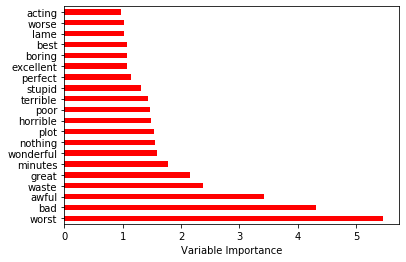

In [24]:
# Random Forest
import matplotlib.pyplot as plt
Importance = pd.DataFrame({'Importance':rf.feature_importances_*100}, index=tfidf.get_feature_names())
Importance = Importance.iloc[rf.feature_importances_ > 0,:]
Importance = Importance.sort_values('Importance', axis=0, ascending=False).head(20)
Importance.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

Based on our random forest model, the five words that were the strongest negative distinguishers were "Worst", "Bad", "Awful", "Waste", and "Horrible". Likewise, the five words that were the strongest positive distinguishers were "Great", "Wonderful", "Perfect", "Excellent", and "Best".

8. Using Vader sentiment analysis, predict whether or not the movie review is positive or negative. (Use a positive compound score for “positive” and a negative compound score for “negative”).

In [51]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/fostertruman/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [52]:
ratings['scores'] = ratings['review'].apply(lambda x: sid.polarity_scores(x))
ratings['compound'] = ratings['scores'].apply(lambda x: x['compound'])

9. How does the accuracy of the sentiment analysis compare with that of the predictive model?

In [53]:
ratings['compound'].iloc[1]

-0.8618

In [54]:
compound = ratings['compound']
for i in range(len(compound)):
    if compound.iloc[i] >= 0:
        compound.iloc[i] = 'pos'
    else:
        compound.iloc[i] = 'neg'

In [55]:
print(compound)

0       neg
1       neg
2       pos
3       pos
4       neg
       ... 
7940    pos
7941    neg
7942    pos
7943    neg
7944    pos
Name: compound, Length: 7945, dtype: object


In [56]:
print(classification_report(ratings['label'], compound))

              precision    recall  f1-score   support

         neg       0.81      0.54      0.65      3973
         pos       0.66      0.87      0.75      3972

    accuracy                           0.71      7945
   macro avg       0.73      0.71      0.70      7945
weighted avg       0.73      0.71      0.70      7945



The Vader sentiment analysis does not perform nearly as well as the other models. It only has an F1 score of 0.71.

10. Try doing sentiment analysis with the TextBlob library. How does the accuracy of TextBlob sentiments compare with Vader and the predictive model?

In [57]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/fostertruman/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [59]:
sample_reviews = ratings[['label','review']]
def detect_polarity(review):
    return TextBlob(review).sentiment.polarity
sample_reviews['polarity'] = sample_reviews.review.apply(detect_polarity)
sample_reviews.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,label,review,polarity
0,neg,how do films like mouse hunt get into theatres...,-0.037921
1,neg,some talented actresses are blessed with a dem...,0.083156
2,pos,this has been an extraordinary year for austra...,0.139608
3,pos,according to hollywood movies made in last few...,0.121206
4,neg,my first press screening of 1998 and already i...,-0.027738


In [60]:
pol_reviews = sample_reviews['polarity']
for i in range(len(pol_reviews)):
    if pol_reviews.iloc[i] >= 0:
        pol_reviews.iloc[i] = 'pos'
    else:
        pol_reviews.iloc[i] = 'neg'
print(pol_reviews)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0       neg
1       pos
2       pos
3       pos
4       neg
       ... 
7940    pos
7941    neg
7942    pos
7943    pos
7944    pos
Name: polarity, Length: 7945, dtype: object


In [63]:
print(classification_report(ratings.label, pol_reviews))

              precision    recall  f1-score   support

         neg       0.92      0.45      0.60      3973
         pos       0.63      0.96      0.76      3972

    accuracy                           0.70      7945
   macro avg       0.78      0.70      0.68      7945
weighted avg       0.78      0.70      0.68      7945



The TextBlob analysis performs about on par with the Vader sentiment analysis (F1 score of 0.7), but does not perform as well as the other models (about 0.89 F1 on average).

11. Run LDA topic modeling using gensim on the movie reviews. How many topics are there? What are the most common words in each topic?

In [73]:
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import sys
import re, numpy as np, pandas as pd
from pprint import pprint

In [74]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data = ratings.review.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['how', 'do', 'films', 'like', 'mouse', 'hunt', 'get', 'into', 'theatres', 'isnt', 'there', 'law', 'or', 'something', 'this', 'diabolical', 'load', 'of', 'claptrap', 'from', 'steven', 'speilbergs', 'dreamworks', 'studio', 'is', 'hollywood', 'family', 'fare', 'at', 'its', 'deadly', 'worst', 'mouse', 'hunt', 'takes', 'the', 'bare', 'threads', 'of', 'plot', 'and', 'tries', 'to', 'prop', 'it', 'up', 'with', 'overacting', 'and', 'flat', 'out', 'stupid', 'slapstick', 'that', 'makes', 'comedies', 'like', 'jingle', 'all', 'the', 'way', 'look', 'decent', 'by', 'comparison', 'writer', 'adam', 'rifkin', 'and', 'director', 'gore', 'verbinski', 'are', 'the', 'names', 'chiefly', 'responsible', 'for', 'this', 'swill', 'the', 'plot', 'for', 'what', 'its', 'worth', 'concerns', 'two', 'brothers', 'nathan', 'lane', 'and', 'an', 'appalling', 'lee', 'evens', 'who', 'inherit', 'poorly', 'run', 'string', 'factory', 'and', 'seemingly', 'worthless', 'house', 'from', 'their', 'eccentric', 'father', 'deciding',

In [76]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=10) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=10)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [79]:
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and perform Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    
    texts_out = []
    nlp = spacy.load('en', disable=['parser', 'ner'])    # Load spacy, but we don't need the parser or NER (named entity extraction) modules
    
    for sent in texts:
        doc = nlp(" ".join(sent)) # perform tokenization, part of speech tagging, etc. on the concatenated words
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

In [80]:
ntopics = 8

# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=ntopics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

ldatopics = lda_model.show_topics(formatted=False)
pprint(lda_model.print_topics())

[(0,
  '0.016*"storyline" + 0.011*"honest" + 0.009*"richard" + 0.009*"honestly" + '
  '0.009*"insult" + 0.008*"rape" + 0.008*"alone" + 0.008*"element" + '
  '0.008*"monster" + 0.008*"term"'),
 (1,
  '0.044*"film" + 0.013*"story" + 0.011*"life" + 0.008*"dvd" + '
  '0.008*"character" + 0.007*"work" + 0.007*"series" + 0.006*"music" + '
  '0.006*"classic" + 0.006*"version"'),
 (2,
  '0.110*"funny" + 0.081*"comedy" + 0.039*"joke" + 0.017*"hilarious" + '
  '0.013*"gangster" + 0.013*"skit" + 0.010*"sitcom" + 0.009*"chinese" + '
  '0.009*"wrestling" + 0.008*"amusing"'),
 (3,
  '0.015*"message" + 0.014*"kick" + 0.014*"animation" + 0.013*"poorly" + '
  '0.013*"cartoon" + 0.012*"island" + 0.012*"earth" + 0.012*"disney" + '
  '0.011*"studio" + 0.010*"theatre"'),
 (4,
  '0.032*"film" + 0.016*"bad" + 0.008*"plot" + 0.008*"scene" + 0.008*"actor" + '
  '0.008*"act" + 0.007*"time" + 0.006*"character" + 0.006*"end" + '
  '0.006*"play"'),
 (5,
  '0.015*"bed" + 0.015*"student" + 0.013*"teen" + 0.012*"sam"

IndexError: list index out of range

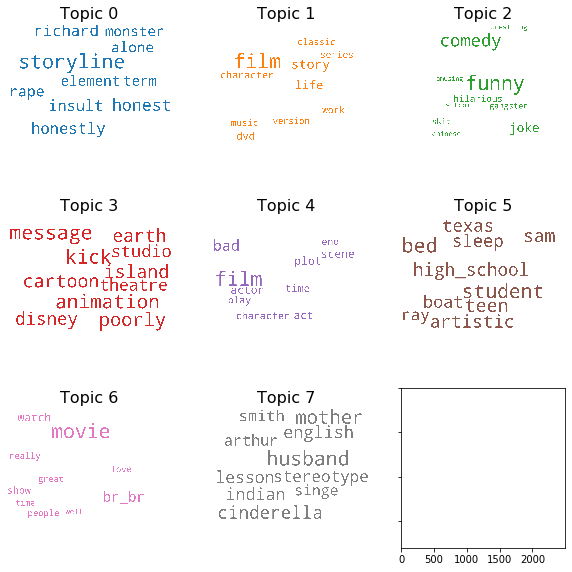

In [83]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()